In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('credit_card_transactions.csv')
df.info()
# df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [3]:
print((df.memory_usage(deep=True).sum()/(1024*1024)))

1163.5949115753174


# Data Cleaning

### This dataset contains a credit card number associated with each transaction, but these card numbers have been anonymized and hashed to protect user privacy

In [6]:
# compute total memory usage of the dataframe
print((df.memory_usage(deep=True).sum()/(1024*1024)))

1163.5949115753174


In [7]:
# drop (delete) the credit card number field 
df.drop('cc_num', axis = 1, inplace = True)

In [8]:
# compute total memory usage after removal of the credit card number column
print((df.memory_usage(deep=True).sum()/(1024*1024)))

1153.7020664215088


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

## We can see the total column count has decreased from 24 to 23, and we have reduced memory usage by ~10 MB

## What additional columns can we remove to reduce the load? 
#### Column 0 = an icrementing integer for each transaction that is not needed

Review whether the integer in column 0 or the unique transaction ID are more resource intesive, suspect transaction ID requires more bits in memory than integer so thats the one we should remove

In [10]:
print((df['Unnamed: 0'].memory_usage(deep=True)/(1024*1024)))
print((df['trans_num'].memory_usage(deep=True)/(1024*1024)))

9.892967224121094
110.0580244064331


## We can see in the output cell above that the memory usage for the first column titled 'Unnamed' compared to the memoryusage for the transaction number column. The Unnamed column includes a unique incrementing integer for each observation. The transaction number is a unique hexidecimal string for each observation. Since it is significantly longer, and uses a character space larger than the base 10 integer number system, it requires more than 10 times the memory to store.

## We will drop the transaction number column, and instead use the Unnamed column integer as our transaction itendifier.

In [11]:
df.drop('trans_num', axis = 1, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [13]:
print((df.memory_usage(deep=True).sum()/(1024*1024)))

1043.6441640853882


## 120 MB of memory saved, reducing our total data size by ~9%

## Since we have lat/long for buyer and seller, we can delete the merchant zipcode column which is incomplete.

In [14]:
df.drop('merch_zipcode', axis = 1, inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [16]:
## Lets review trans_date_trans_time to see if it's needed

In [17]:
df.describe()

,Unnamed: 0,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [20]:
df.head()

,Unnamed: 0,trans_date_trans_time,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0


## Lets investigate transaction timing info a bit. I'm curious to learn how fraud is distributed by month

<Figure size 1400x1000 with 0 Axes>

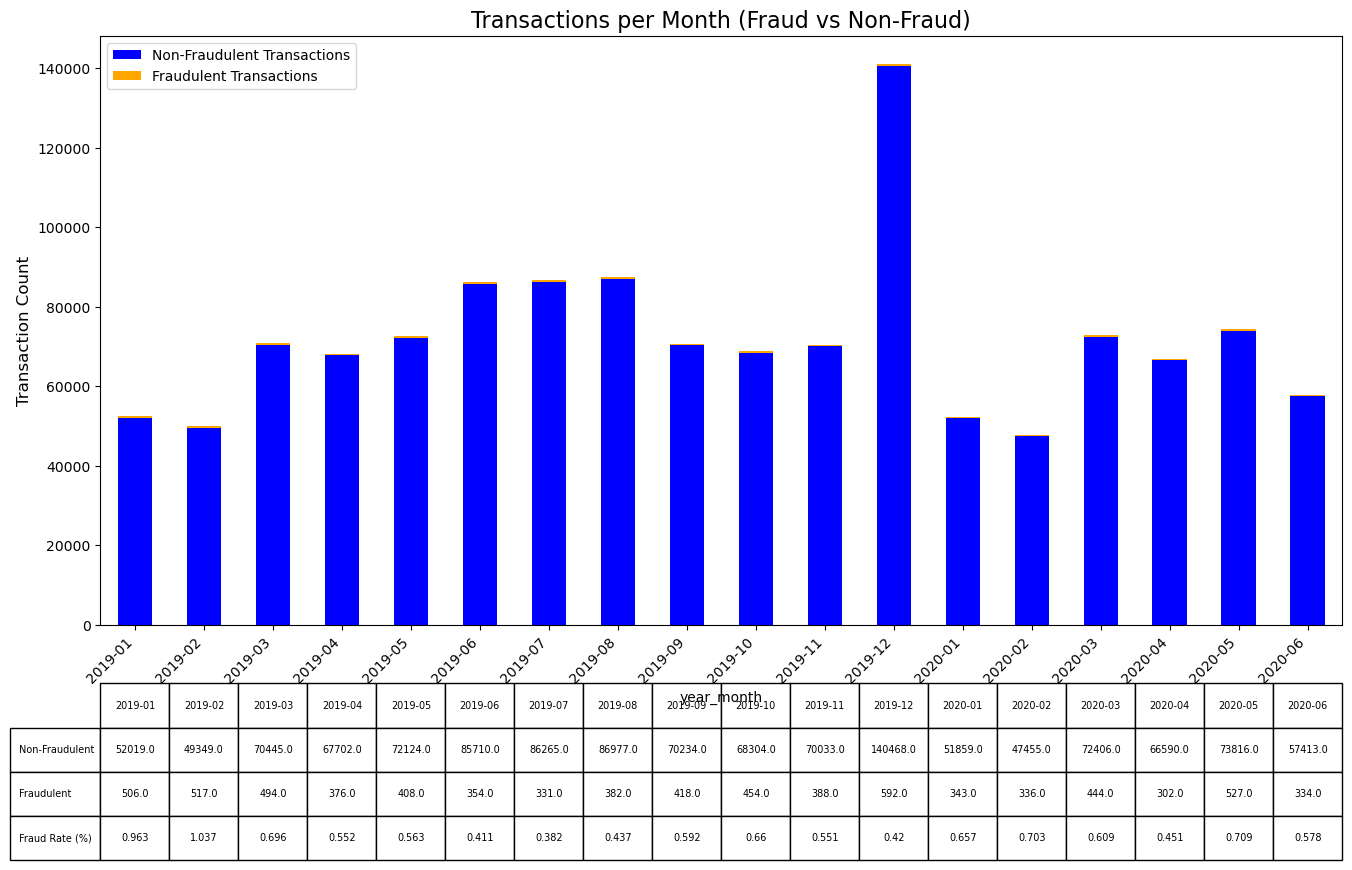

In [58]:
# calculate the fraud rate by month
fraud_counts['Fraud_Rate'] = (fraud_counts[1] / (fraud_counts[0] + fraud_counts[1])) * 100
fraud_counts['Fraud_Rate'] = fraud_counts['Fraud_Rate'].round(3)

# build a stacked bar chart with counts of regular and fraudulent transactions
plt.figure(figsize=(14, 10))
ax = fraud_counts[[0, 1]].plot(kind='bar', stacked=True, figsize=(14, 7), color=['blue', 'orange'])
plt.title('Transactions per Month (Fraud vs Non-Fraud)', fontsize=16)
# plt.xlabel('Year-Month', fontsize=12, loc='left')
plt.ylabel('Transaction Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(['Non-Fraudulent Transactions', 'Fraudulent Transactions'], loc='upper left', fontsize=10)

# build the sub-table
table_data_transposed = fraud_counts[[0, 1]].transpose()
fraud_rate_row = fraud_counts['Fraud_Rate']
table_with_fraud_rate = pd.concat([table_data_transposed, fraud_rate_row.to_frame().T])
table_with_fraud_rate.index = ['Non-Fraudulent', 'Fraudulent', 'Fraud Rate (%)']

# plot table with fraud rate
plt.table(cellText=table_with_fraud_rate.values,
          colLabels=table_with_fraud_rate.columns.astype(str),
          rowLabels=table_with_fraud_rate.index,
          cellLoc='center', loc='bottom', bbox=[0, -0.4, 1, 0.3])

# fit the table and plot it
plt.tight_layout()
plt.subplots_adjust(bottom=.1)
plt.show()

In [60]:
total_non_fraudulent = fraud_counts[0].sum()  # Non-fraudulent transactions
total_fraudulent = fraud_counts[1].sum()      # Fraudulent transactions

# Calculate grand total
grand_total = total_non_fraudulent + total_fraudulent

# Display the totals
print(f"Total Non-Fraudulent Transactions: {total_non_fraudulent}")
print(f"Total Fraudulent Transactions: {total_fraudulent}")
print(f"Grand Total Transactions: {grand_total}")

Total Non-Fraudulent Transactions: 1289169
Total Fraudulent Transactions: 7506
Grand Total Transactions: 1296675


## This graphic contains a lot of great summary stats:
### - Overall we can see that our dataset spreads ~18 months from the beginning of 2019 through mid-2020. 
### - There is a pronounced spike in December 2019, which is nearly double the average transaction volume compared to other months. This is likely explained by seasonal holiday spending patterns.
### - We've bucketed transactions by month, and separated non-fraudlent (standard) transactions from fraudlent charges. Counts for each category are provided, and we also normalized for the variation in monthly transaction volume by creating a fraud rate by month. 
### - There is some variation in fraud rate month to month, but the changes are not large or repeated year over year, so there is not likely to be a pattern or significant correlation with the month of the transaction

In [63]:

## Lets review gender and fraud counts to determine if we can remove the column
gender_fraud_counts = df.groupby(['gender', 'is_fraud']).size().unstack(fill_value=0)

# calculate fraud rates by gender
gender_fraud_counts['Fraud_Rate'] = (gender_fraud_counts[1] / (gender_fraud_counts[0] + gender_fraud_counts[1])) * 100

# rund the fraud rate for better readability
gender_fraud_counts['Fraud_Rate'] = gender_fraud_counts['Fraud_Rate'].round(3)
print(gender_fraud_counts)

is_fraud       0     1  Fraud_Rate
gender                            
F         706128  3735       0.526
M         583041  3771       0.643


## Overall we can see that there is a fairly even split between the two genders within the dataset (~706K female transactions vs ~583K male)
## The fraud rates between the two categories are similar
## We can safely drop the gender column to save memory

In [67]:
df.drop('gender', axis = 1, inplace = True)

In [68]:
print((df.memory_usage(deep=True).sum()/(1024*1024)))

887.8318529129028


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   street                 1296675 non-null  object        
 8   city                   1296675 non-null  object        
 9   state                  1296675 non-null  object        
 10  zip                    1296675 non-null  int64         
 11  lat                    1296675 non-null  float64       
 12  long                   12966

## Lets continue to hunt for data to remove. The unix time does not appear to be correct and all the dates that are provided in the trans_date_trans_time category are exactly 7 years before the time of the converted unix_time value
## We will remove the unix_time value since the trans_date value is easier to read and it doesn't really matter what year the transaction was in

In [72]:
df.drop('unix_time', axis = 1, inplace = True)

In [73]:
print((df.memory_usage(deep=True).sum()/(1024*1024)))

877.9390077590942


## We can also drop the street, city, state, and zip columns since we have a lat/long for each transaction

In [75]:
df.drop('street', axis = 1, inplace = True)
df.drop('city', axis = 1, inplace = True)
df.drop('zip', axis = 1, inplace = True)

In [76]:
print((df.memory_usage(deep=True).sum()/(1024*1024)))

688.8851633071899


## Lets look at fraud frequency by transaction value

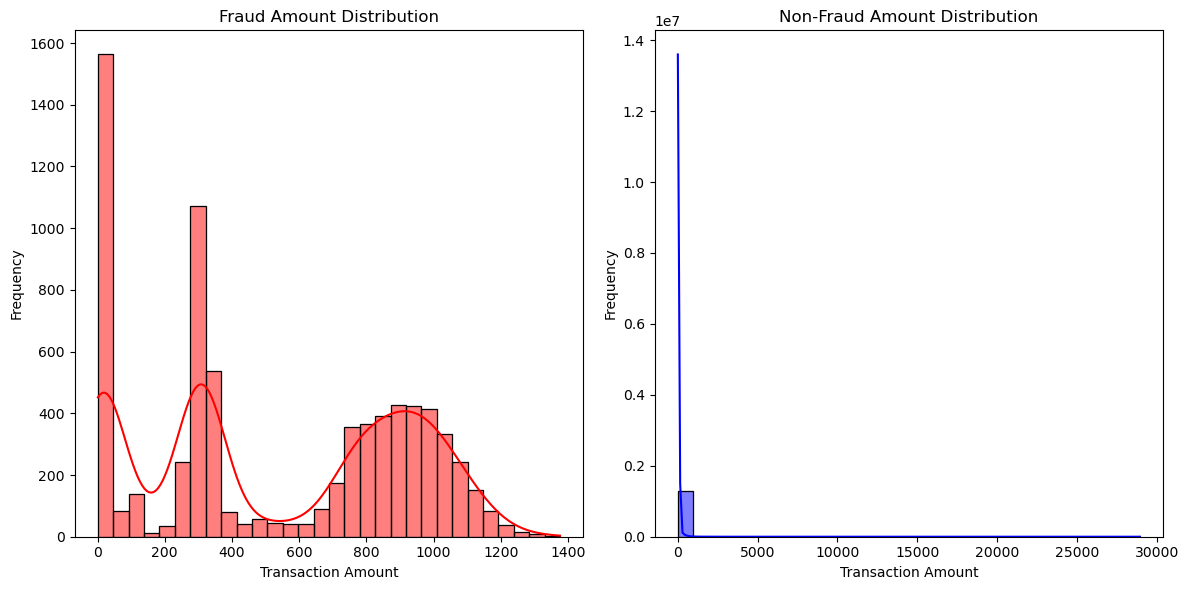

In [80]:
# plot fraud and non-fraud distributions for 'amt'

# fraud bucket
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[df['is_fraud'] == 1]['amt'], bins=30, kde=True, color='red')
plt.title('Fraud Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

# non-fraud bucket
plt.subplot(1, 2, 2)
sns.histplot(df[df['is_fraud'] == 0]['amt'], bins=30, kde=True, color='blue')
plt.title('Non-Fraud Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
## There are a few interesting points in this chart:
### The range of values for fraudulent transactions is much smaller than the range of non-fraud transactions
### The outliers at the top end of the amount range for non-fraud transactions are masking a lot of the data for lower transactions. Lets review the subset of transactions between $1 and $500 to remove some of the noise

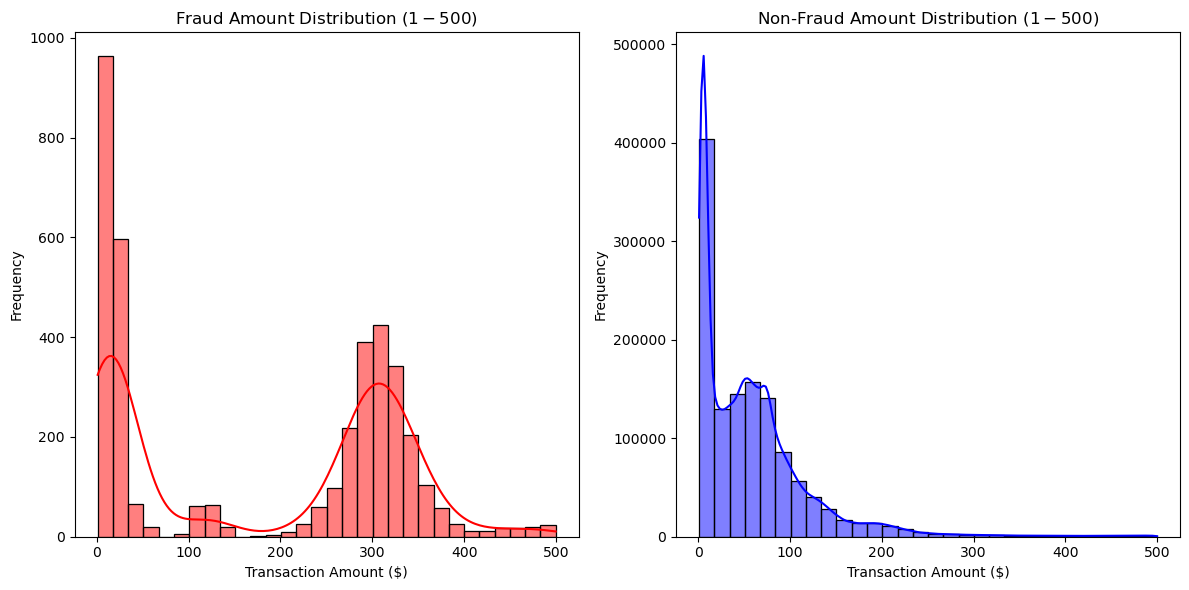

In [84]:
# filter the data for transactions with amounts between 1 and 500
filtered_data = df[(df['amt'] > 1) & (df['amt'] <= 500)]
plt.figure(figsize=(12, 6))

# fraud transactions
plt.subplot(1, 2, 1)
sns.histplot(filtered_data[filtered_data['is_fraud'] == 1]['amt'], bins=30, kde=True, color='red')
plt.title('Fraud Amount Distribution ($1 - $500)')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Frequency')

# non-fraud transactions
plt.subplot(1, 2, 2)
sns.histplot(filtered_data[filtered_data['is_fraud'] == 0]['amt'], bins=30, kde=True, color='blue')
plt.title('Non-Fraud Amount Distribution ($1 - $500)')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Here we can see a significant "bunching" of fraudulent transactions right around the $300 dollar mark. This bunching is not present in non-fraud transactions

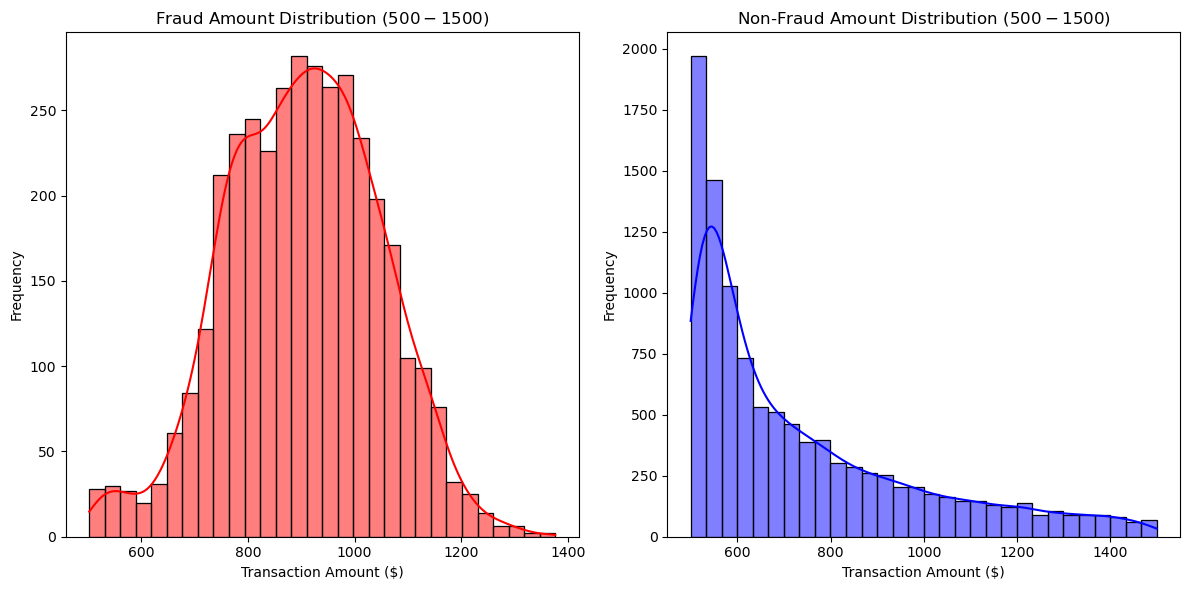

In [86]:
# filter the data for transactions with amounts between 1 and 500
filtered_data = df[(df['amt'] > 500) & (df['amt'] <= 1500)]
plt.figure(figsize=(12, 6))

# fraud transactions
plt.subplot(1, 2, 1)
sns.histplot(filtered_data[filtered_data['is_fraud'] == 1]['amt'], bins=30, kde=True, color='red')
plt.title('Fraud Amount Distribution ($500 - $1500)')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Frequency')

# non-fraud transactions
plt.subplot(1, 2, 2)
sns.histplot(filtered_data[filtered_data['is_fraud'] == 0]['amt'], bins=30, kde=True, color='blue')
plt.title('Non-Fraud Amount Distribution ($500 - $1500)')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## We can see like the sub-500 dollar class, there is also a significant concentration of fraudulent transactions around the 950 to 1,000 dollar range that differs significantly from the non-fraud class

## We can continue to repurpose this code snippet to inspect different classes like transaction timing
## Lets bucket the transactions by hour (24 buckets based on transaction time) to see if there is anything interesting 

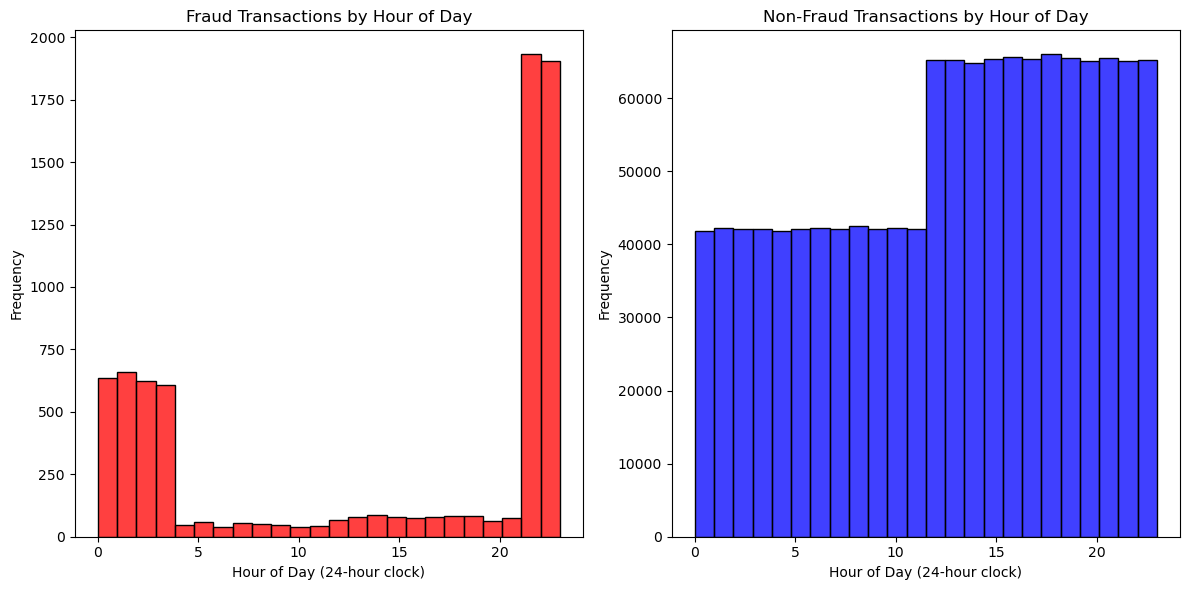

In [88]:
# clean 'trans_date_trans_time' column to datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# extract the hour from the transaction time
df['hour_of_day'] = df['trans_date_trans_time'].dt.hour

# plot fraud and non-fraud distributions for transaction time
plt.figure(figsize=(12, 6))

# fraud transactions
plt.subplot(1, 2, 1)
sns.histplot(df[df['is_fraud'] == 1]['hour_of_day'], bins=24, kde=False, color='red')
plt.title('Fraud Transactions by Hour of Day')
plt.xlabel('Hour of Day (24-hour clock)')
plt.ylabel('Frequency')

# non-fraud transactions
plt.subplot(1, 2, 2)
sns.histplot(df[df['is_fraud'] == 0]['hour_of_day'], bins=24, kde=False, color='blue')
plt.title('Non-Fraud Transactions by Hour of Day')
plt.xlabel('Hour of Day (24-hour clock)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Right away we can see a big difference in the way that transactions are distributed temporally
## Non-fraud transactions are lower at night time and higher during the daytime as one would expect
## Fraud transctions on the other hand have a significant spike between 22 and 2400, with much lower incidences during the daytime
## This is also a significant divergence between the two datasets so it will be interesting to see if this is a factor in our model

## Lets review the DOB column to see if there is any significant difference between classes

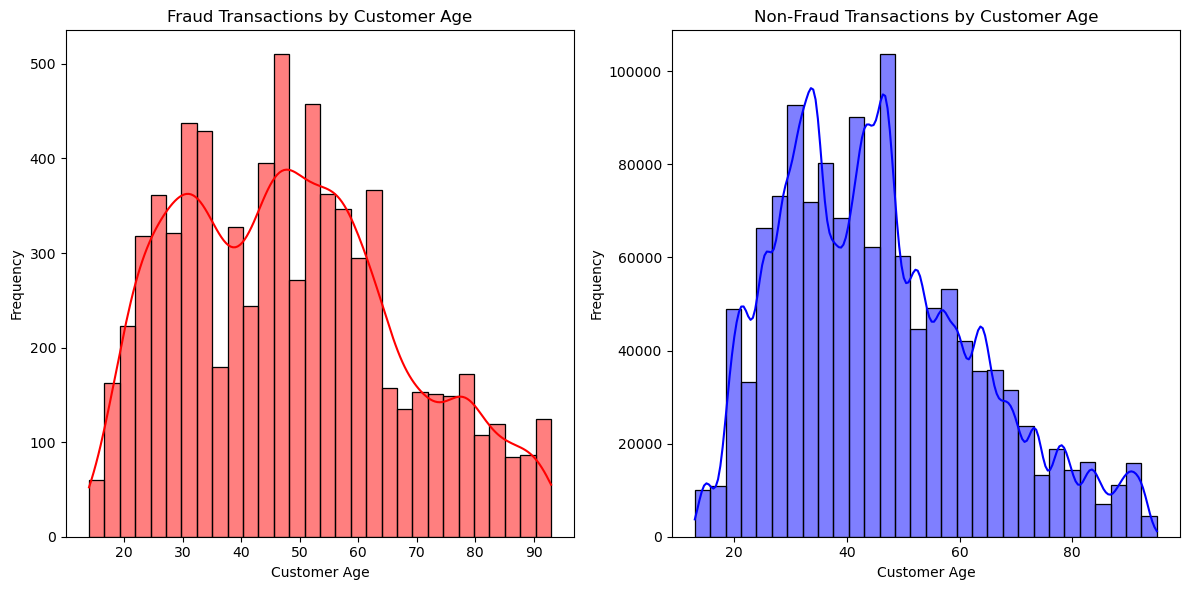

In [95]:
# check 'dob' column is in datetime format
df['dob'] = pd.to_datetime(df['dob'])

# calculate customer age at the time of the transaction
df['customer_age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year

# adjust for transactions before the customer's birthday
df['customer_age'] -= (df['trans_date_trans_time'].dt.month < df['dob'].dt.month) | \
                        ((df['trans_date_trans_time'].dt.month == df['dob'].dt.month) & 
                         (df['trans_date_trans_time'].dt.day < df['dob'].dt.day))

# plot fraud and non-fraud distributions for customer age
plt.figure(figsize=(12, 6))

# fraud transactions
plt.subplot(1, 2, 1)
sns.histplot(df[df['is_fraud'] == 1]['customer_age'], bins=30, kde=True, color='red')
plt.title('Fraud Transactions by Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')

# non-fraud transactions
plt.subplot(1, 2, 2)
sns.histplot(df[df['is_fraud'] == 0]['customer_age'], bins=30, kde=True, color='blue')
plt.title('Non-Fraud Transactions by Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## Overall it looks like a fairly even distribution of ages in both datasets. There is a slight bias towards younger ages in the fraud class that is not present in the non-fraud class

## Lets look at fraud transactions by population to see if there is anything interesting

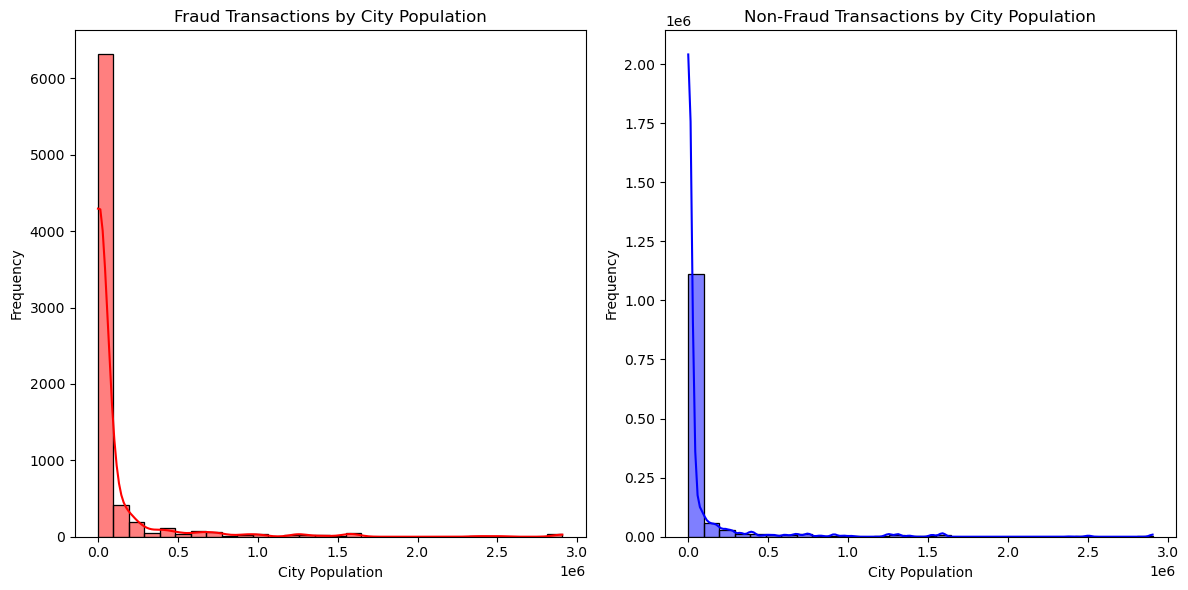

In [105]:
# plot fraud and non-fraud distributions for city population
plt.figure(figsize=(12, 6))

# fraud transactions
plt.subplot(1, 2, 1)
sns.histplot(df[df['is_fraud'] == 1]['city_pop'], bins=30, kde=True, color='red')
plt.title('Fraud Transactions by City Population')
plt.xlabel('City Population')
plt.ylabel('Frequency')

# non-fraud transactions
plt.subplot(1, 2, 2)
sns.histplot(df[df['is_fraud'] == 0]['city_pop'], bins=30, kde=True, color='blue')
plt.title('Non-Fraud Transactions by City Population')
plt.xlabel('City Population')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

